## P2. Investigate a Dataset

Para este trabalho foi escolhido trabalhar com conjunto de dados dos passageiros do Titanic (https://www.udacity.com/api/nodes/5420148578/supplemental_media/titanic-datacsv/download).

#### Conhecendo o Dataset

In [1]:
# Importa o pandas
import pandas as pd

In [2]:
# Carrega o dataset
titanic_df = pd.read_csv('C:\\Users\\bruno\\Documents\\Data Analyst Nanodegree\\P2.Investigate a Dataset\\titanic_data.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Entendendo as variáveis

PassengerId: código de cada passageiro

Survived: passageiro sobreviveu (0 = não, 1 = sim)

Pclass: classe (1 = 1ª, 2 = 2ª, 3 = 3ª)

Name: nome do passageiro

Sex: sexo (male = Masculino, female = Feminino)

Age: idade

Sibsp: quantidade de irmãos e/ou cônjuges abordo

Parch: quantidade de pais e/ou filhos abordo

Ticket: número do ticket

Fare: valor da passagem em libras esterlinas

Cabin: número da cabine

Embarked: porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
# Trás os tipos de dados
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Existem variáveis que devem ser transformadas antes de trabalharmos com os dados. Ex: 'Pclass' deve ser uma variável categórica ao invés de interia.

In [5]:
# Transforma as variáveis categóricas
titanic_df['PassengerId'] = titanic_df['PassengerId'].astype('category')
titanic_df['Survived'] = titanic_df['Survived'].astype('category')
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')
titanic_df['Sex'] = titanic_df['Sex'].astype('category')
titanic_df['Embarked'] = titanic_df['Embarked'].astype('category')

In [6]:
# Checa mudanças
titanic_df.dtypes

PassengerId    category
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

#### Questões para ser investigadas

1- Imagina-se que crianças e mulheres tenham tido prioridade nos poucos botes salva vidas que haviam no navio, logo devem apresentar um número maior de sobreviventes.

2- A taxa de sobreviventes é maior para os passageiros da primeira classe? Isso poderia indicar que quem pagou mais também teve prioridade nos botes.

#### Trabalhando os dados

In [7]:
# Verifica se os dados estão completos
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Nota-se que duas variáveis não possuem todos os dados, 'Age' e 'Cabin'. No caso da segunda, preferiu-se excluí-la pois a quantidade de dados faltantes é muito alta e não parece ser uma variável relevante para nossa análise.

In [8]:
# Exclui a variável Cabin do conjunto de dados
titanic_df = titanic_df.drop('Cabin', axis=1)

In [9]:
# Checa se a variável foi excluída
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Não serão estimados valores para os dados faltantes da variável 'Age', portanto, os passageiros que não apresentarem valor para esta variável serão desconsiderados.

No entanto, é preciso garantir que a exclusão destes passageiros não irá comprometer a análise. Uma forma de fazer isto é verificar a taxa de sobreviventes antes e depois da alteração no conjunto de dados.

In [10]:
# Trás o número de sobreviventes e não sobreviventes antes da alteração dos dados
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
# Trás a taxa de sobreviventes e não sobreviventes antes da alteração dos dados
titanic_df['Survived'].value_counts()/(titanic_df['Survived'].value_counts()[0]+titanic_df['Survived'].value_counts()[1])

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [12]:
# Cria um novo conjunto de dados excluindo aqueles passageiros que não possuem dados de idade
titanic_df_na = titanic_df.dropna()

# Trás o número de sobreviventes e não sobreviventes do novo conjunto de dados
titanic_df_na['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [13]:
# Trás a taxa de sobreviventes e não sobreviventes do novo conjunto de dados
titanic_df_na['Survived'].value_counts()/(titanic_df_na['Survived'].value_counts()[0]+titanic_df_na['Survived'].value_counts()[1])

0    0.595506
1    0.404494
Name: Survived, dtype: float64

Nota-se que a taxa de sobreviventes passou de 38,4% para 40,4% após a exclusão de algumas linhas. Por conta desta pequena diferença de apenas 2% pode-se afirmar que as linhas foram removidas quase que igualmente entre sobreviventes e não sobreviventes e, portanto, o novo conjunto de dados pode ser utilizado para análise do impacto da idade dos passageiros no número de sobreviventes do desastre.

#### Analisando o impacto das variáveis no número de sobreviventes

A primeira variável a ser estudada será a 'Age'.

In [14]:
# Importa o Seaborn
import seaborn as sns

# Importa o Pyplot
import matplotlib.pyplot as plt
%matplotlib inline

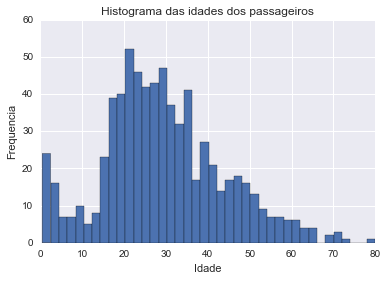

In [15]:
# Gera histograma das idades dos passageiros
plt.hist(titanic_df_na['Age'], bins=40)
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.title('Histograma das idades dos passageiros')

Nota-se que a maioria dos passagerios tinha entre 16 e 36 anos de idade. Porém, havia uma quantidade considerável de crianças abaixo de 10 anos, portanto, será criada uma nova variável booleana, 'Crianca', que permetirá analisar a taxa de sobreviventes dentro desta faixa etária.

In [16]:
# Cria variável 'Crianca'
titanic_df_na['Crianca'] = titanic_df_na['Age'] < 10

C:\Users\bruno\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
# Verifica se a variável foi criada corretamente
titanic_df_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Crianca
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False


Agora é necessário verificar a taxa de sobreviventes entre crianças ('True') e adultos ('False').

In [18]:
# Trás o número de sobreviventes e não sobreviventes entre crianças e adultos
crianca = pd.crosstab(titanic_df_na['Crianca'], titanic_df_na['Survived'])
crianca

Survived,0,1
Crianca,,
False,400,250
True,24,38


In [19]:
# Trás a taxa de sobreviventes e não sobreviventes entre crianças e adultos
crianca_porc = crianca.div(crianca.sum(1).astype(float), axis=0)
crianca_porc

Survived,0,1
Crianca,,
False,0.615385,0.384615
True,0.387097,0.612903


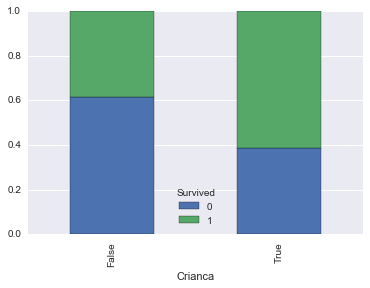

In [20]:
# Gera gráfico das taxas de sobreviventes entre crianças e adultos
crianca_porc.plot(kind='bar', stacked='True')

A taxa de sobreviventes entre crianças (61,3%) foi maior do que entre adultos (38,5%). Este é um bom indício de que as crianças tiveram prioridade nos botes salva vidas.

Para entender se mulheres também tiveram prioridade nos botes salva vidas é preciso analisar a taxa de sobreviventes entre cada sexo.

In [21]:
# Trás o número de sobreviventes e não sobreviventes entre os sexos
sexo = pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])
sexo

Survived,0,1
Sex,,
female,81,233
male,468,109


In [22]:
# Trás a taxa de sobreviventes e não sobreviventes entre os sexos
sexo_porc = sexo.div(sexo.sum(1).astype(float), axis=0)
sexo_porc

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


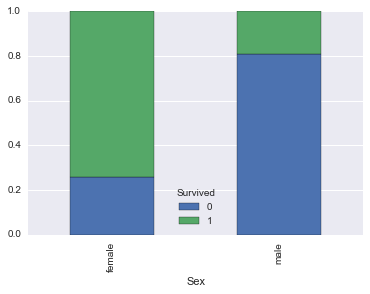

In [23]:
# Gera gráfico das taxas de sobreviventes entre mulheres e homens
sexo_porc.plot(kind='bar', stacked='True')

Aqui percebe-se uma taxa de sobreviventes muito maior entre mulheres (74,2%) do que entre homens (18,9%). Forte indício de que as mulheres tiveram de fato prioridade nos botes salva vidas.

Note que nesta análise foi utilizado o conjunto de dados completo, isto justifica a diferença entre o número absoluto de passageiros desta análise (891) e o número absoluto da análise Crianças x Adultos (712).

Para entender melhor o impacto duas variáveis estudadas até aqui, 'Sex' e 'Crianca', na taxa de sobreviventes elas serão analisadas em conjunto.

In [24]:
# Trás o número de sobreviventes e não sobreviventes entre passageiros do sexo feminino e 
# masculino com mais ou até 10 anos de idade
sexo_crianca = pd.crosstab([titanic_df_na['Sex'], titanic_df_na['Crianca']], titanic_df_na['Survived'])
sexo_crianca

Survived          0    1
Sex    Crianca          
female False     53  176
       True      11   19
male   False    347   74
       True      13   19

In [25]:
# Trás a taxa de sobreviventes e não sobreviventes entre passageiros do sexo feminino e
# masculino com mais ou até 10 anos de idade
sexo_crianca_porc = sexo_crianca.div(sexo_crianca.sum(1).astype(float), axis=0)
sexo_crianca_porc

Survived               0         1
Sex    Crianca                    
female False    0.231441  0.768559
       True     0.366667  0.633333
male   False    0.824228  0.175772
       True     0.406250  0.593750

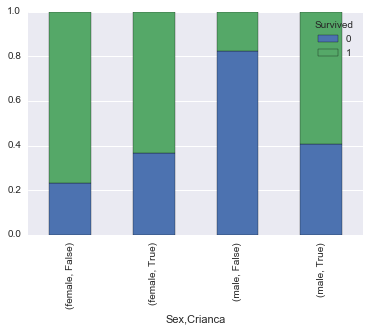

In [26]:
# Gera gráfico das taxas de sobreviventes entre passageiros do sexo feminino e
# masculino com mais ou até 10 anos de idade
sexo_crianca_porc.plot(kind='bar', stacked='True')

Fica claro que caso você fosse homem e com mais de 10 anos de idade sua chance de sobreviver ao desastre do Titanic era muito baixa. Aparentemente o grupo que teve prioridade nos botes salva vidas foram mulheres com mais de 10 anos. No caso das crianças parece não ter existido distinção entre meninos e meninas uma vez que suas taxas de sobrevivência são bem similares.

Será analisada agora a variável 'Pclass' para entender se existiu prioridade nos botes salva vidas para aqueles que pagaram mais caro pela passagem. Para tal será analisada a taxa de sobreviventes entre as três classes do navio.

In [27]:
# Trás o número de sobreviventes e não sobreviventes entre as classes
classe = pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])
classe

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [28]:
# Trás a taxa de sobreviventes e não sobreviventes entre as classes
classe_porc = classe.div(classe.sum(1).astype(float), axis=0)
classe_porc

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


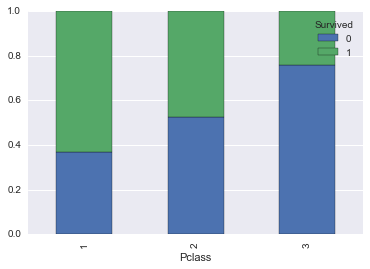

In [29]:
# Gera gráfico das taxas de sobreviventes entre as classes
classe_porc.plot(kind='bar', stacked='True')

Pelos dados observados pode-se dizer que os passageiros da primeira classe tiveram prioridade nos botes salva vidas sobre os passageiros da segunda e terceira classe, assim como os da segunda classe tiveram prioridade sobre os da terceira classe.

Para certificar que os passageiros das classes superiores realmente pagaram mais caro pelo sua passagem é preciso analisar a variável 'Fare'.

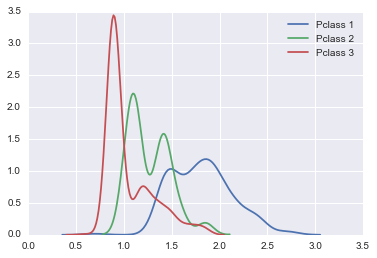

In [48]:
# Gera o gráfico de densidade para distribuição de frequências para cada 
# PClass sobrepostas

df = titanic_df[titanic_df['Fare']>0][['Pclass', 'Fare']]
for i in range(1,4):
    sns.kdeplot(df[df['Pclass']==i]['Fare'].apply(np.log10), 
                label='Pclass {}'.format(i))

In [31]:
# Trás a mediana dos preços das passagens para cada classe
titanic_df.groupby('Pclass')['Fare'].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

O resultado acima comprova que havia uma grande diferença no preço pago nas passagens de primeira classe em relação as demais. Isto suporta a teoria de que as pessoas mais ricas, as quais pagaram mais por sua passagem, tiveram prioridade nos botes salva vidas.

Para entender melhor o impacto da variável 'Pclass' na taxa de sobreviventes ela será cruzada com os resultados da variável 'Sex'.

In [32]:
# Trás o número de sobreviventes e não sobreviventes entre passageiros do sexo feminino e 
# masculino das diferentes classes
sexo_classe = pd.crosstab([titanic_df['Sex'], titanic_df['Pclass']], titanic_df['Survived'])
sexo_classe

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

In [33]:
# Trás a taxa de sobreviventes e não sobreviventes entre passageiros do sexo feminino e 
# masculino das diferentes classes
sexo_classe_proc = sexo_classe.div(sexo_classe.sum(1).astype(float), axis=0)
sexo_classe_proc

Survived              0         1
Sex    Pclass                    
female 1       0.031915  0.968085
       2       0.078947  0.921053
       3       0.500000  0.500000
male   1       0.631148  0.368852
       2       0.842593  0.157407
       3       0.864553  0.135447

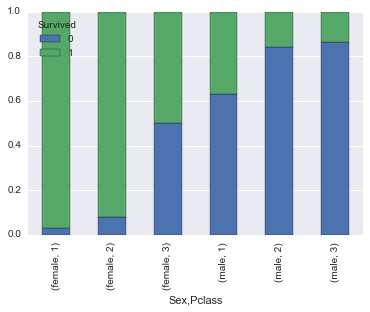

In [34]:
# Gera gráfico das taxas de sobreviventes entre passageiros do sexo feminino e 
# masculino das diferentes classes
sexo_classe_proc.plot(kind='bar', stacked='True')

Mais de 90% das mulheres que estavam na primeira e segunda classe sobreviveram ao desastre. Uma mulher na terceira classe ainda tinha mais chance de sobreviver do que um homem na primeira classe.

#### Conclusão

Antes de apresentar qualquer conclusão é importante lembrar que estas análises não tem nenhum valor estatístico, ou seja, nada comprova de fato que as correlações que encontramos não tenham sido apenas obra do acaso.

Os resultados obtidos neste documento sugerem que o principal fator para ter prioridade em um dos botes salva vidas do Titanic era ser Mulher. Entretanto, como não havia botes suficientes para todas as mulheres, tiveram prioridade aquelas da primeira e segunda classe. O fato de ser criança ou não não fez diferença entre as mulheres, porém se mostrou importante entre os homens sobreviventes. Muito provavelmente os filhos pequenos foram autorizado a embarcar nos botes com suas mães e por isto apresentaram uma taxa de sobrevivência mais alta que os homens adultos.

Relembrando as questões que foram levantadas no início do trabalho:

1- Imagina-se que crianças e mulheres tenham tido prioridade nos poucos botes salva vidas que haviam no navio, logo devem apresentar um número maior de sobreviventes.
R: Sim, os dados mostraram que as Mulheres, de todas as idades, tiveram prioridade nos botes salva vidas e em seguida as crianças.

2- A taxa de sobreviventes é maior para os passageiros da primeira classe? Isso poderia indicar que quem pagou mais também teve prioridade nos botes.
R: Esta hipotése se sustentou apenas para as Mulheres.

Novamente, este trabalho não tem como objetivo encontrar se teve algo que de fato causou a sobrevivência ou não dos passageiros, a ideia aqui foi apenas levantar suposições. Para futuros trabalhos podem ser realisados testes estatísticos para determinar se as diferenças entre sobreviventes e não sobreviventes encontradas em cada variável estudada são significantes ou obra do acaso.

#### Referências

http://stackoverflow.com/questions/15723628/pandas-make-a-column-dtype-object-or-factor

http://felipegalvao.com.br/blog/2016/02/29/manipulacao-de-dados-com-python-pandas/

https://www.continuum.io/content/pandas-categoricals

https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html

Livro: Python for Data Analysis / Autor: Wes McKinney